In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = '/content/drive/MyDrive/Maestria/SemestreII/CDA Final/'

In [5]:
datos = pd.read_csv(dir+"procesado_df.csv")

In [6]:
datos.head(1)

,Unnamed: 0,df_index,review_score,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,0,0,4,185.0,13.63,credit_card,8,397.26,sao joaquim da barra,SP,osasco,SP,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,2,4.289855,4.5,4.10747,346,6.82,4.0,0.0,0.0,0,0,1


## **Eliminar columnas categóricas**

In [7]:
datos.drop(columns=[
        'Unnamed: 0', 'df_index','payment_type', 'payment_installments', 'payment_value', "product_category_name", "customer_state","customer_city","seller_state","seller_city"
        ], inplace = True)

In [8]:
datos.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,4,185.0,13.63,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,2,4.289855,4.50,4.10747,346,6.82,4.0,0.0,0.0,0,0,1
1,4,185.0,13.63,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,2,4.289855,4.50,4.10747,346,6.82,4.0,0.0,0.0,0,0,1
2,5,185.0,20.26,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,1,4.289855,4.50,4.10747,1100,20.26,13.0,0.0,0.0,0,0,1
3,5,185.0,17.05,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,1,4.289855,4.50,4.10747,519,17.05,19.0,0.0,0.0,0,0,1
4,5,135.0,18.20,47.0,858.0,1.0,1600.0,30.0,30.0,35.0,2,4.289855,4.25,4.10747,188,9.10,16.0,0.0,0.0,0,0,1


## **Correlacion**

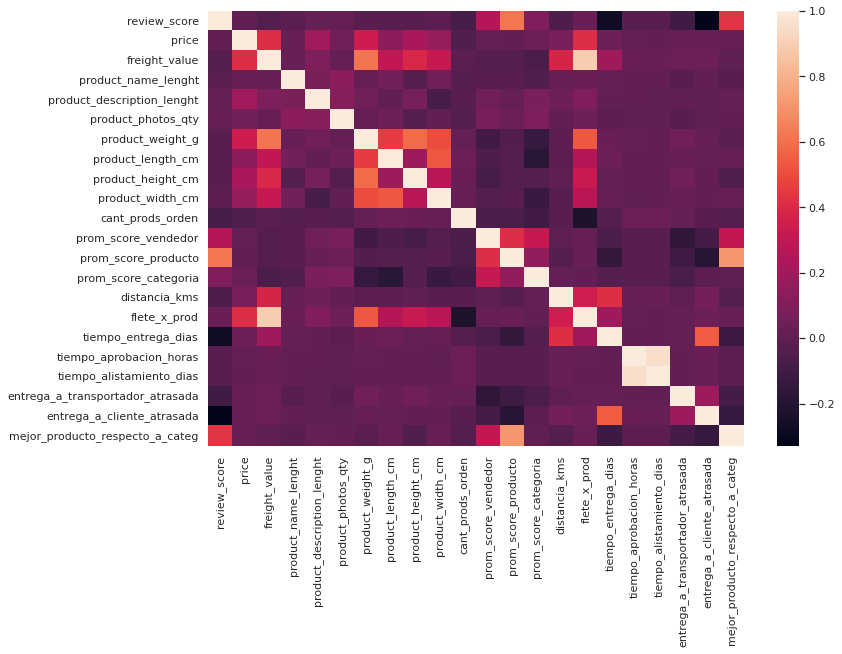

In [9]:
sns.heatmap(datos.corr())

In [10]:
estimators_normalized = [
              ('encoder', OrdinalEncoder()),
              ('normalize', MinMaxScaler()),
             ]             
pipe_normalized = Pipeline(estimators_normalized)
pipe_normalized

Pipeline(memory=None,
         steps=[('encoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('normalize', MinMaxScaler(copy=True, feature_range=(0, 1)))],
         verbose=False)

In [84]:
data_norm = pd.DataFrame(pipe_normalized.fit_transform(datos), columns=datos.columns)
data_norm.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,0.75,0.628626,0.162323,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.043478,0.721687,0.862170,0.56338,0.116852,0.098680,0.083916,0.0,0.0,0.0,0.0,1.0
1,0.75,0.628626,0.162323,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.043478,0.721687,0.862170,0.56338,0.116852,0.098680,0.083916,0.0,0.0,0.0,0.0,1.0
2,1.00,0.628626,0.258844,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.000000,0.721687,0.862170,0.56338,0.371496,0.295455,0.146853,0.0,0.0,0.0,0.0,1.0
3,1.00,0.628626,0.212112,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.000000,0.721687,0.862170,0.56338,0.175279,0.248387,0.188811,0.0,0.0,0.0,0.0,1.0
4,1.00,0.519715,0.228854,0.656250,0.283917,0.0,0.427252,0.234694,0.277228,0.311828,0.043478,0.721687,0.696481,0.56338,0.063492,0.131965,0.167832,0.0,0.0,0.0,0.0,1.0


In [85]:
data_norm.corr()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
review_score,1.000000,0.009580,-0.040290,-0.014043,0.015265,0.021380,-0.020494,-0.019971,-0.023176,-0.011935,-0.113470,0.245754,0.566763,0.092373,-0.056245,0.044314,-0.275003,-0.017299,-0.017072,-0.105213,-0.328857,0.434710
price,0.009580,1.000000,0.446395,0.044952,0.220987,0.045824,0.494527,0.240142,0.308012,0.264999,-0.083752,0.073624,0.027414,0.034504,0.114879,0.439812,0.077972,-0.001365,-0.004099,0.027537,0.026056,0.030938
freight_value,-0.040290,0.446395,1.000000,0.027986,0.118587,0.019652,0.533720,0.320403,0.399155,0.336070,-0.022842,-0.016443,-0.021447,-0.030451,0.478312,0.854183,0.253678,0.033837,0.026114,0.035360,0.045014,-0.004568
product_name_lenght,-0.014043,0.044952,0.027986,1.000000,0.091154,0.143268,0.070278,0.062505,-0.029271,0.064769,-0.028256,-0.064215,-0.032302,-0.065774,0.021548,0.036195,0.015683,0.008692,0.005142,-0.023486,0.006297,-0.022793
product_description_lenght,0.015265,0.220987,0.118587,0.091154,1.000000,0.120324,0.079851,0.008360,0.080521,-0.073911,-0.025269,0.080964,0.027032,0.110811,0.045394,0.120945,0.004754,0.008902,0.003295,-0.000915,0.001536,0.015403
product_photos_qty,0.021380,0.045824,0.019652,0.143268,0.120324,1.000000,0.024453,0.045654,-0.033444,0.004985,-0.054501,0.075556,0.035551,0.084992,0.014740,0.052118,-0.010302,0.002681,0.001803,-0.020866,-0.002076,0.010822
product_weight_g,-0.020494,0.494527,0.533720,0.070278,0.079851,0.024453,1.000000,0.564961,0.587840,0.609489,0.031126,-0.067917,-0.028739,-0.084216,0.003060,0.442257,0.047936,0.015937,0.013303,0.048840,0.018793,0.002209
product_length_cm,-0.019971,0.240142,0.320403,0.062505,0.008360,0.045654,0.564961,1.000000,0.190493,0.535980,0.034579,-0.058470,-0.025832,-0.139242,-0.008150,0.259924,0.036311,0.008924,0.007563,0.026354,0.014650,0.023371
product_height_cm,-0.023176,0.308012,0.399155,-0.029271,0.080521,-0.033444,0.587840,0.190493,1.000000,0.279098,0.040338,-0.059478,-0.035087,0.064749,0.000352,0.317740,0.017985,0.013167,0.010810,0.055702,0.010891,-0.044622
product_width_cm,-0.011935,0.264999,0.336070,0.064769,-0.073911,0.004985,0.609489,0.535980,0.279098,1.000000,0.023630,-0.049942,-0.015994,-0.117131,-0.019755,0.280760,0.020118,0.000128,0.003312,0.025431,0.004566,0.027270


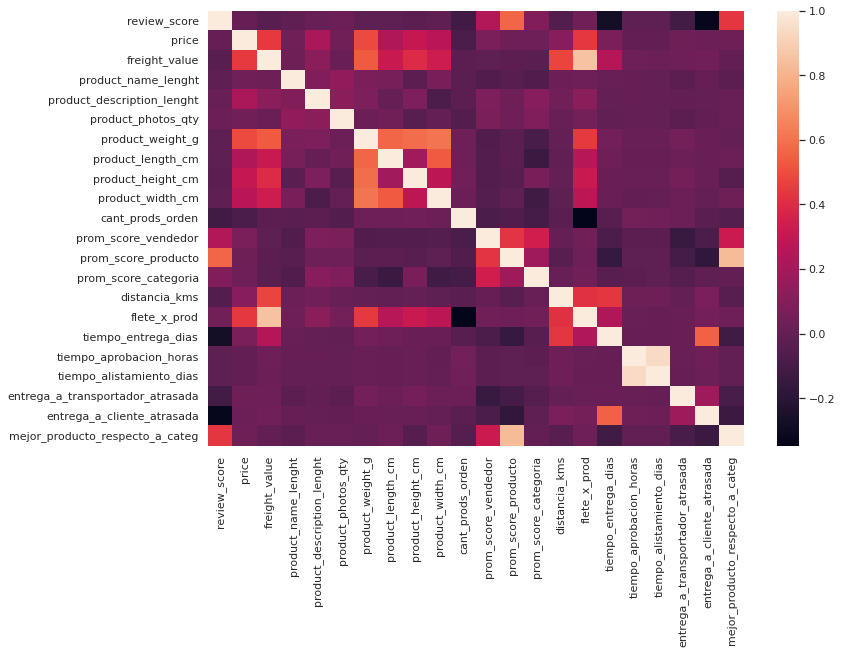

In [86]:
sns.heatmap(data_norm.corr())

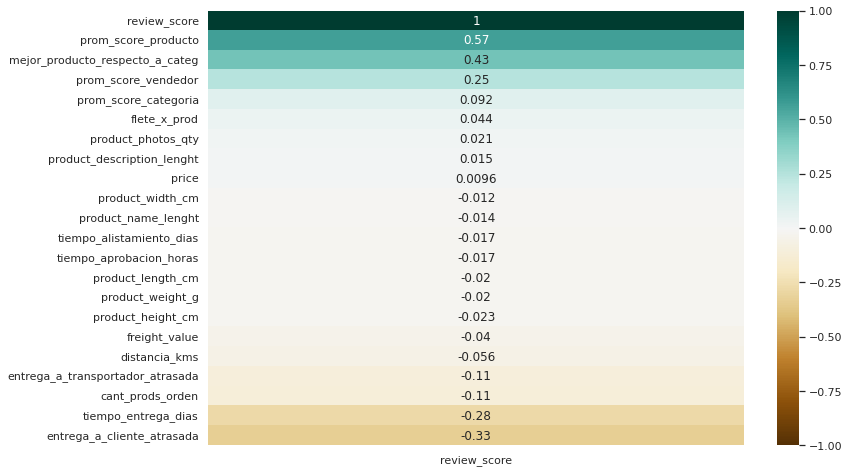

In [87]:
heatmap = sns.heatmap(data_norm.corr()[['review_score']].sort_values(by='review_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [88]:
# data_norm = data_norm.drop(columns=["prom_score_producto"])
data_norm.drop(columns=[
        # 'product_photos_qty',
        "product_length_cm","product_width_cm","product_name_lenght","price","product_weight_g","product_height_cm",
        "tiempo_alistamiento_dias","tiempo_aprobacion_horas",
        "freight_value","product_description_lenght"
        # , "cant_prods_orden"
        ], inplace = True)
data_norm

,review_score,product_photos_qty,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,0.75,0.000000,0.043478,0.721687,0.862170,0.563380,0.116852,0.098680,0.083916,0.0,0.0,1.0
1,0.75,0.000000,0.043478,0.721687,0.862170,0.563380,0.116852,0.098680,0.083916,0.0,0.0,1.0
2,1.00,0.000000,0.000000,0.721687,0.862170,0.563380,0.371496,0.295455,0.146853,0.0,0.0,1.0
3,1.00,0.000000,0.000000,0.721687,0.862170,0.563380,0.175279,0.248387,0.188811,0.0,0.0,1.0
4,1.00,0.000000,0.043478,0.721687,0.696481,0.563380,0.063492,0.131965,0.167832,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112648,1.00,0.222222,0.000000,0.822892,0.760997,0.042254,0.829450,0.678739,0.188811,0.0,0.0,1.0
112649,1.00,0.222222,0.000000,0.822892,0.760997,0.042254,0.292469,0.559824,0.097902,0.0,0.0,1.0
112650,1.00,0.166667,0.000000,0.802410,1.000000,0.042254,0.206687,0.288416,0.118881,0.0,0.0,1.0
112651,0.75,0.166667,0.000000,0.802410,0.501466,0.042254,0.100979,0.208065,0.083916,0.0,0.0,1.0


In [107]:
data_norm.review_score.value_counts()

1.00    64825
0.75    21710
0.00    12808
0.50     9483
0.25     3827
Name: review_score, dtype: int64

In [93]:

x_train, x_test, y_train, y_test = train_test_split( data_norm.drop('review_score', axis=1), data_norm['review_score'], test_size = 0.3, random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.26172767439579564

In [96]:

predictions = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.26165355498703485

In [98]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

predictions = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_test, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.23070905718699253

In [99]:
forest_reg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [100]:
from sklearn import metrics

y_true=y_test
pred=predictions

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, pred))
print('Max Error:', metrics.max_error(y_true, pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, pred))
print('R^2:', metrics.r2_score(y_true, pred))

Mean Absolute Error (MAE): 0.14897545920483515
Mean Squared Error (MSE): 0.053226669068110986
Root Mean Squared Error (RMSE): 0.23070905718699253
Explained Variance Score: 0.5285620539794424
Max Error: 0.995
Mean Squared Log Error: 0.02344721580654257
Median Absolute Error: 0.09750000000000003
R^2: 0.5277933260178722


In [101]:
from sklearn import metrics

predictTra = forest_reg.predict(x_train)

y_true=y_train
pred=predictTra

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, pred))
print('Max Error:', metrics.max_error(y_true, pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, pred))
print('R^2:', metrics.r2_score(y_true, pred))

Mean Absolute Error (MAE): 0.05558149408686359
Mean Squared Error (MSE): 0.0077265324150938295
Root Mean Squared Error (RMSE): 0.08790069632883366
Explained Variance Score: 0.9319514278030483
Max Error: 0.6672142857142856
Mean Squared Log Error: 0.0040038439776422996
Median Absolute Error: 0.03500000000000003
R^2: 0.931908473788649


In [102]:
importances = forest_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_reg.estimators_], axis=0)
feature_names = [f"Variable {i}" for i in range(data_norm.drop('review_score', axis=1).shape[1])]

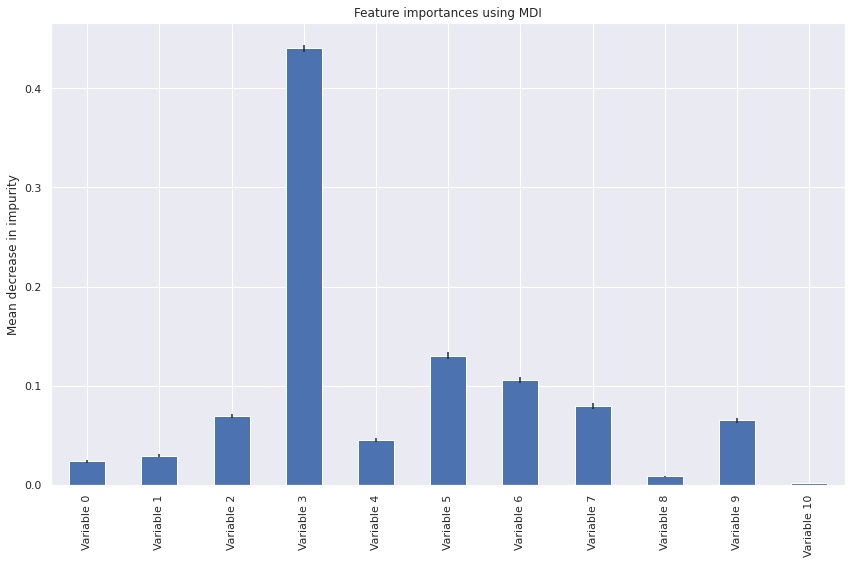

In [103]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [104]:
sample_data = pd.DataFrame({       
        'Variable': data_norm.drop('review_score', axis=1).columns, 
        'NumVariable' : range(0, len(data_norm.drop('review_score', axis=1).columns))}
     )
sample_data

,Variable,NumVariable
0,product_photos_qty,0
1,cant_prods_orden,1
2,prom_score_vendedor,2
3,prom_score_producto,3
4,prom_score_categoria,4
5,distancia_kms,5
6,flete_x_prod,6
7,tiempo_entrega_dias,7
8,entrega_a_transportador_atrasada,8
9,entrega_a_cliente_atrasada,9
